In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from viz import viz
from bokeh.plotting import figure, show, output_notebook, output_file, save
from functions import merge_data
import load_data

df = load_data.load_county_level()
outcome_cases = load_data.outcome_cases
outcome_deaths = load_data.outcome_deaths
df, df_test = load_data.split_data(df)

print(df.keys())

Loading BokehJS ...

Index(['id', 'Header-FIPSStandCtyCode', 'EntityofFile',
       'SecondaryEntityOfFile', 'DateofFile', 'DateofCreation', 'FileLength',
       'StateName', 'StateNameAbbreviation', 'CountyName',
       ...
       'DiabetesPercentage', 'Respiratory Mortality', 'dem_to_rep_ratio',
       '#Hospitals', '#ICU_beds', 'HeartDiseaseMortality', 'StrokeMortality',
       'Smokers_Percentage', 'FracMale2017', '#FTEHospitalTotal2017'],
      dtype='object', length=7305)


## how many deaths/cases are there

In [2]:
df[[outcome_deaths, outcome_cases, 'StateName', 'CountyName', ]].head(10)

,#Deaths_3/22/2020,#Cases_3/22/2020,StateName,CountyName
1831,60.0,9045.0,New York,New York
1121,15.0,451.0,Louisiana,Orleans
202,10.0,302.0,California,Santa Clara
2955,10.0,480.0,Washington,Snohomish
1748,7.0,457.0,New Jersey,Bergen
407,6.0,52.0,Georgia,Dougherty
583,6.0,805.0,Illinois,Cook
282,5.0,208.0,Connecticut,Fairfield
178,5.0,409.0,California,Los Angeles
393,5.0,67.0,Georgia,Cobb


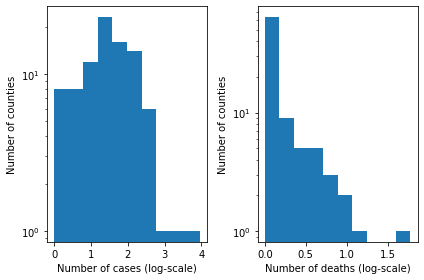

In [3]:
d = df[df[outcome_deaths] > 0]
R, C = 1, 2
plt.subplot(R, C, 1)
plt.hist(np.log10(d[outcome_cases]))
plt.xlabel('Number of cases (log-scale)')
plt.ylabel('Number of counties')
plt.yscale('log')

plt.subplot(R, C, 2)
plt.hist(np.log10(d[outcome_deaths]))
plt.xlabel('Number of deaths (log-scale)')
plt.ylabel('Number of counties')
plt.yscale('log')
plt.tight_layout()
plt.show()

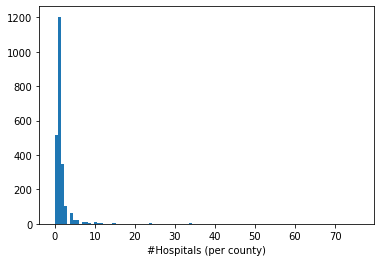

In [5]:
plt.hist(df['#Hospitals'], bins=100)
plt.xlabel('#Hospitals (per county)')
plt.show()

In [4]:
demographics = ['PopulationEstimate2018', 'Population(Persons)2017',  
                'PopTotalMale2017', 'PopTotalFemale2017', 'FracMale2017',
                'PopulationEstimate65+2017',
                'PopulationDensityperSqMile2010',
                'MedianAge2010', 'MedianAge,Male2010', 'MedianAge,Female2010']

# hospital vars
hospitals_hrsa = ['#FTEHospitalTotal2017', "TotalM.D.'s,TotNon-FedandFed2017", '#HospParticipatinginNetwork2017']
hospitals_misc = ["#Hospitals", "#ICU_beds"]
hospitals = hospitals_hrsa + hospitals_misc

# comorbidity (simultaneous presence of multiple conditions) vars
comorbidity_hrsa = [ '#EligibleforMedicare2018',  'MedicareEnrollment,AgedTot2017', '3-YrDiabetes2015-17']
comorbidity_misc = ["DiabetesPercentage", "HeartDiseaseMortality", "StrokeMortality", "Smokers_Percentage"]
comorbidity = comorbidity_hrsa + comorbidity_misc

# political leanings (ratio of democrat : republican votes in 2016 presidential election)
political = ['dem_to_rep_ratio']

important_vars = demographics + comorbidity + hospitals + political

# correlations

In [ ]:
sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = df[important_vars + [outcome_cases, outcome_deaths]]

# Compute the correlation matrix
corrs = d.corr(method='spearman')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
plt.figure(figsize=(8, 8), dpi=300)
sns.heatmap(corrs, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
# sns.clustermap(corr, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.tight_layout()
plt.savefig('results/correlations_heatmap.png')
plt.show()

In [ ]:
keys = np.array(corrs.index)
k = np.where(keys == outcome_deaths)[0][0]
corrs_row = corrs.iloc[k]
args = np.argsort(corrs_row)
plt.figure(dpi=300, figsize=(6, 5))
plt.barh(keys[args][:-1], corrs_row[args][:-1]) # 1 to drop outcome itself
plt.xlabel('Correlation (spearman) with # deaths')
plt.tight_layout()
plt.savefig('results/correlations.png')
plt.show()

# interactive plots

In [ ]:
# filter by state
for state in ['NY', 'WA', 'CA']:
    d = df[df["StateNameAbbreviation"] == state]

    p = viz.plot_counties(d, 
                          variable_to_distribute=outcome_cases,
                          variables_to_display=important_vars,
                          state=state,
                          logcolor=False)
    
    output_file(f"results/{state}.html", mode='inline')
    show(p)
    save(p)

In [ ]:
sorted(list([k for k in df.keys() if '' in k.lower()]))

## plot political leaning

In [ ]:
# filter by state
for state in ['NY', 'WA', 'CA']:
    d = df[df["StateNameAbbreviation"] == state]

    p = viz.plot_counties(d, 
                          variable_to_distribute='dem_to_rep_ratio',
                          variables_to_display=important_vars,
                          state=state,
                          logcolor=False)
    show(p)